In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('/content/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [9]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [10]:
df.sex.value_counts()

,count
sex,
male,676
female,662


<ipython-input-35-85a998f7f9e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],color="green")


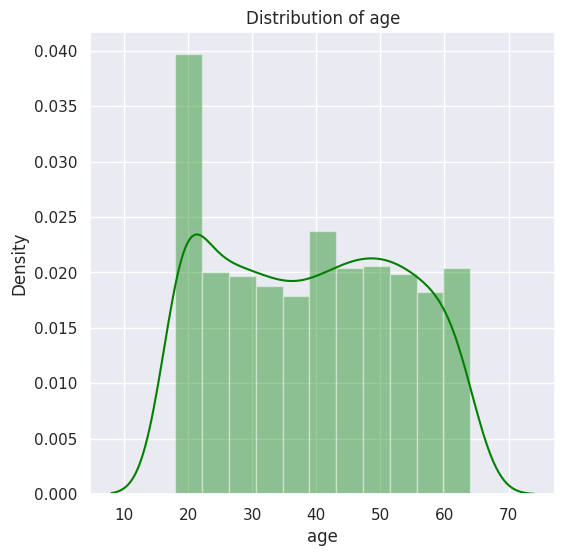

In [35]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'],color="green")
plt.title("Distribution of age")
plt.show()

<ipython-input-36-f7a6cdb1e95b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'],color="green")


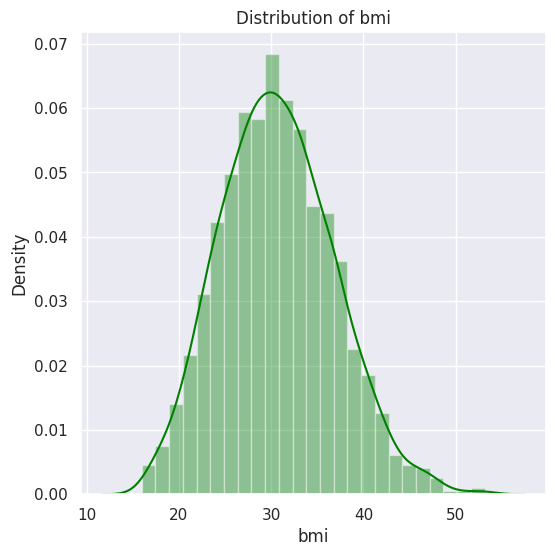

In [36]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'],color="green")
plt.title("Distribution of bmi")
plt.show()

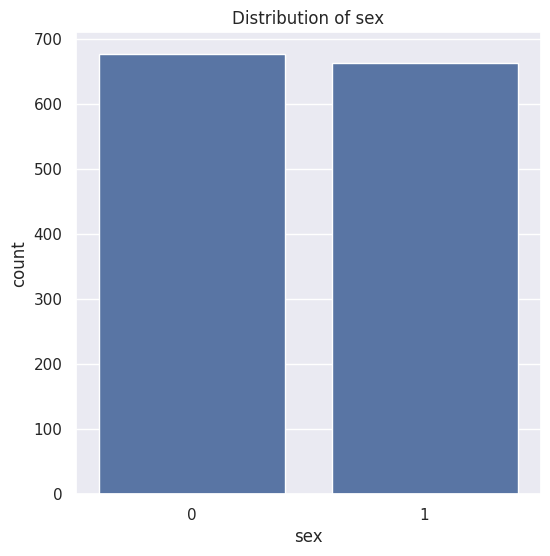

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title("Distribution of sex")
plt.show()

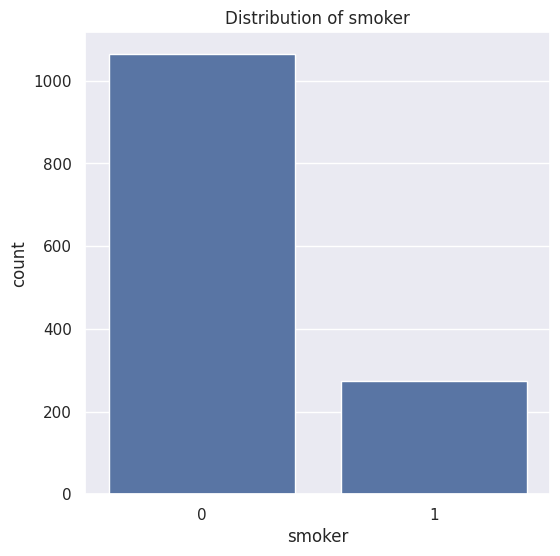

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title("Distribution of smoker")
plt.show()

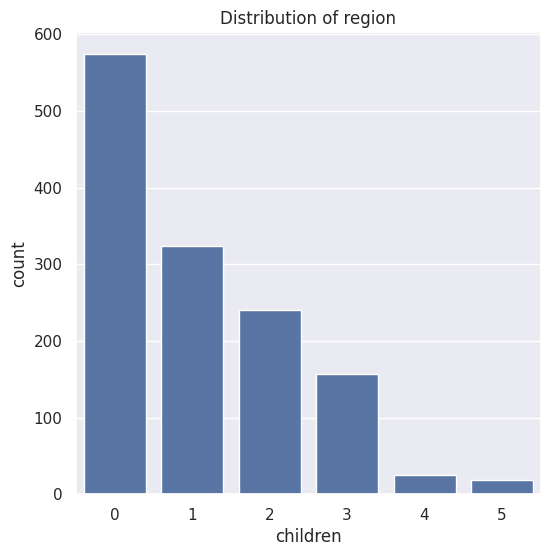

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title("Distribution of region")
plt.show()

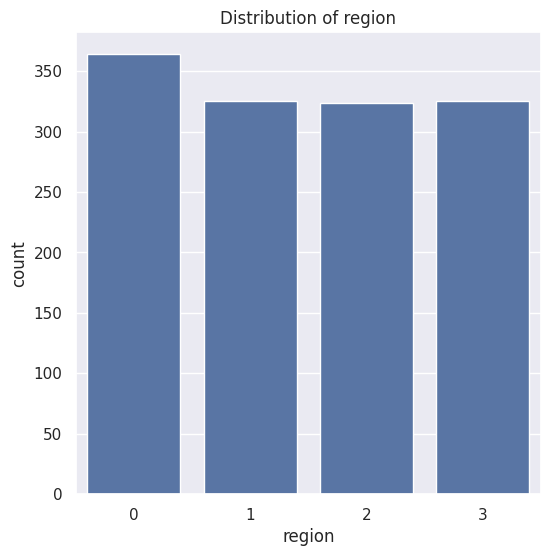

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title("Distribution of region")
plt.show()

In [13]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-13-09441b21215b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [15]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,0,3756.62160
6,46,1,33.440,1,0,0,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,3,28923.13692


In [16]:
X=df.drop('charges',axis=1)
Y=df['charges']

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_train_predict=model.predict(X_train)

In [25]:
print("r2 score",r2_score(Y_train,Y_train_predict))

r2 score 0.751505643411174


In [26]:
Y_test_predict=model.predict(X_test)
print("r2 score",r2_score(Y_test,Y_test_predict))

r2 score 0.7447273869684076


In [27]:
sample_data=(27,0,42.13,0,1,0)

In [28]:
sample_data=np.asarray(sample_data).reshape(1,-1)

In [29]:
prediction=model.predict(sample_data)
print(prediction)

[32075.73866962]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
